In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import custom helper functions
from utils.setup import Config
from utils.data import get_trade_and_book_by_stock_and_time_id
from utils.helpers import *

In [2]:
train_df = pd.read_csv(Config.data_directory / "train.csv")
train_df.head()

,stock_id,time_id,target
0,0,5,0.004136
1,0,11,0.001445
2,0,16,0.002168
3,0,31,0.002195
4,0,62,0.001747


In [3]:
# total number of training points
len(train_df)

428932

In [4]:
# there are 127 unique stocks we will model
stock_ids = train_df.stock_id.unique()
stock_ids

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  46,  47,  48,  50,  51,  52,  53,  55,  56,  58,
        59,  60,  61,  62,  63,  64,  66,  67,  68,  69,  70,  72,  73,
        74,  75,  76,  77,  78,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       118, 119, 120, 122, 123, 124, 125, 126], dtype=int64)

In [5]:
print(f"Average number of observations per stock: {int(len(train_df )/ 127)}")

Average number of observations per stock: 3377


count     112.000000
mean     3829.750000
std         1.700556
min      3815.000000
25%      3830.000000
50%      3830.000000
75%      3830.000000
max      3830.000000
dtype: float64

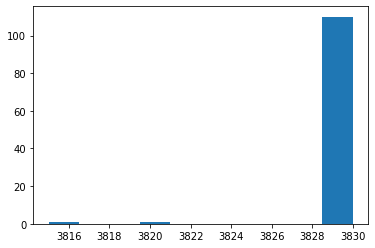

In [6]:
# look at the distribution of the observations across the stocks
display(train_df.groupby("stock_id").apply(len).describe())

plt.hist(train_df.groupby("stock_id").apply(len))
plt.show()

Comment: Basically all have 3830 observations per stock, only a few outliers.

count    3830.000000
mean      111.992689
std         0.085201
min       111.000000
25%       112.000000
50%       112.000000
75%       112.000000
max       112.000000
dtype: float64

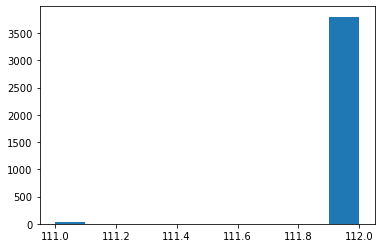

In [7]:
# look at the distribution of stocks for each time_id (i.e for each time do we have all stocks or only some)
display(train_df.groupby("time_id").apply(len).describe())
plt.hist(train_df.groupby("time_id").apply(len))
plt.show()

Comment: looks like we have most of the data on average (112 out of possible 127) but not all.

## Example

In [16]:
# taking a look at a particular stock and time id.abs

book, trade = get_trade_and_book_by_stock_and_time_id(5, 5)
book.set_index("seconds_in_bucket")
book.head()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id
0,5,0,0.999749,1.001348,0.999655,1.001361,308,5,11,11,5
1,5,1,0.999749,1.001348,0.999655,1.001361,308,4,11,11,5
2,5,3,0.999749,1.001348,0.999655,1.001361,328,4,11,11,5
3,5,4,0.999749,1.001348,0.999655,1.001361,378,4,11,11,5
4,5,5,0.999776,1.001348,0.999763,1.001361,228,4,21,11,5


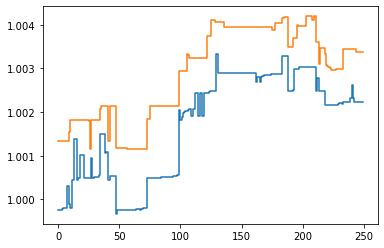

In [21]:
# best price time series
plt.step(book.index, book.bid_price1)
plt.step(book.index, book.ask_price1)
plt.show()

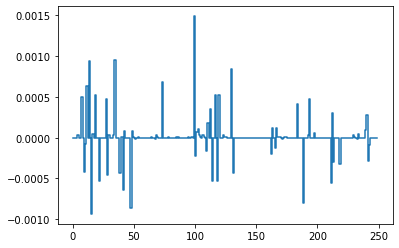

In [24]:
# look at how the returns are distributed

plt.step(book.index, log_return(book.bid_price1))

(array([  3.,   1.,   5.,   5.,   4., 204.,  11.,   3.,   4.,   5.,   1.,
          2.,   0.,   0.,   1.]),
 array([-9.3399151e-04, -7.7251269e-04, -6.1103381e-04, -4.4955497e-04,
        -2.8807612e-04, -1.2659728e-04,  3.4881570e-05,  1.9636042e-04,
         3.5783925e-04,  5.1931810e-04,  6.8079698e-04,  8.4227580e-04,
         1.0037547e-03,  1.1652336e-03,  1.3267123e-03,  1.4881912e-03],
       dtype=float32),
 <BarContainer object of 15 artists>)

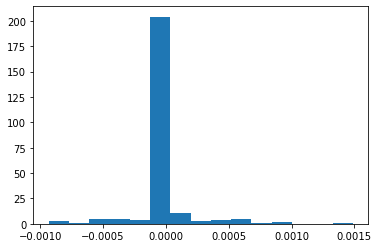

In [27]:
plt.hist(log_return(book.bid_price1), bins = 15)

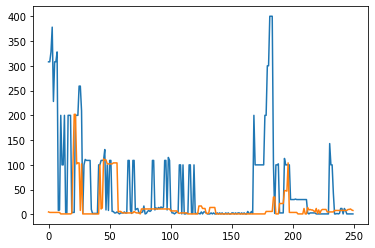

In [31]:
# liquidity on best bid and offer is imbalanced
# favours the bid side (makes sense since this stock is going up at this moment in time)
plt.plot(book.bid_size1)
plt.plot(book.ask_size1)